# EEG-03 Solutions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

Today's demonstration will introduce time-frequency analysis of EEG data using `mne-python`. We will start by loading the epoched data from last session.

In [2]:
from mne import read_epochs

## Load data.
f = os.path.join('..','eeg-data','sub-01_task-audvis-epo.fif')
epochs = read_epochs(f, preload=True, verbose=False)

## Section 1: Time-Frequency Decomposition

In this section, we will apply spectral decomposition to the visual evoked potentials from last class. Specifically, we will use Morlet wavelet decomposition to study the time-frequency composition of the evoked potentials.

First we need to define the parameters of the Morlet wavelet decomposition. This includes:

- *freqs*: frequencies of interest
- *n_cycles*: the number of cycles used for estimation, either globally or for each frequency
- *decim*: by what factor to downsample the data



In [3]:
## Define parameters.
freqs = np.logspace(np.log(8), np.log(30), num=10, base=np.e)
n_cycles = 3

Next we will perform the decomposition for each condition separately.

In [4]:
from mne.time_frequency import tfr_morlet

## Extract epochs.
LV = epochs['LV'].copy()
RV = epochs['RV'].copy()

## Perform time-frequency decomposition.
LV_power = tfr_morlet(LV, freqs, n_cycles, average=True, return_itc=False, verbose=False)
RV_power = tfr_morlet(RV, freqs, n_cycles, average=True, return_itc=False, verbose=False)

It is important to perform baseline correlations for time-frequency data. There are many methods for performing baseline correction. Here we will use the log-ratio technique:

$$ \text{decibel power} = 10 \times \log_{10}{\frac{\text{power}}{\text{baseline}}} $$

In [5]:
## Define parameters.
baseline = (-0.150, -0.050)
method = 'logratio'

## Convert to decibels.
LV_power = 10 * LV_power.apply_baseline(baseline, 'logratio').data
RV_power = 10 * RV_power.apply_baseline(baseline, 'logratio').data
print('LV_power shape =', LV_power.shape)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
LV_power shape = (59, 10, 421)


Now let's visualize the difference between the right and left visual stimulus presentation for a left posterior channel, EEG 057.

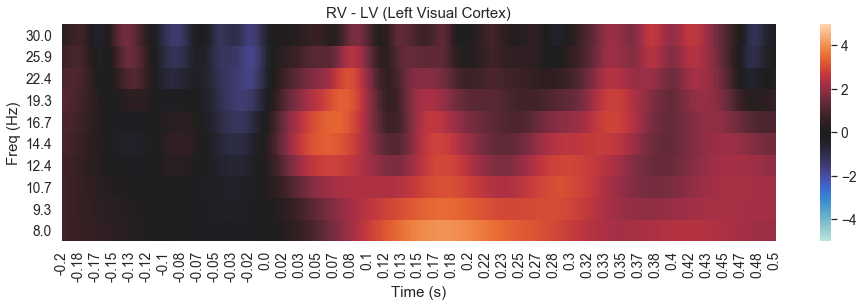

In [6]:
## initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(16,4))

## Compute difference.
diff = RV_power[epochs.ch_names.index('EEG 057')] - LV_power[epochs.ch_names.index('EEG 057')]

## Plotting.
sns.heatmap(diff, center=0, vmin=-5, vmax=5, yticklabels=freqs.round(1), ax=ax)
ax.set(xticks=np.arange(epochs.times.size)[::10], xticklabels=epochs.times[::10].round(2),
       xlabel='Time (s)', ylabel='Freq (Hz)', title='RV - LV (Left Visual Cortex)')
ax.invert_yaxis()

## Section 2: Phase-Locked vs. Induced Power
To compute nonphase-locked power (also sometimes called “induced” activity), we must subtract the event-related potential (ERP) from single trials.

In [7]:
from mne.time_frequency import tfr_morlet

## Extract epochs.
LV = epochs['LV'].copy()
RV = epochs['RV'].copy()

## Subtracted evoked potential
LV = LV.subtract_evoked()
RV = RV.subtract_evoked()

## Perform time-frequency decomposition.
LV_power = tfr_morlet(LV, freqs, n_cycles, average=True, return_itc=False, verbose=False)
RV_power = tfr_morlet(RV, freqs, n_cycles, average=True, return_itc=False, verbose=False)

Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]


It is important to perform baseline correlations for time-frequency data. There are many methods for performing baseline correction. Here we will use the log-ratio technique:

$$ \text{decibel power} = 10 \times \log_{10}{\frac{\text{power}}{\text{baseline}}} $$

In [8]:
## Define parameters.
baseline = (-0.150, -0.050)
method = 'logratio'

## Convert to decibels.
LV_power = 10 * LV_power.apply_baseline(baseline, 'logratio').data
RV_power = 10 * RV_power.apply_baseline(baseline, 'logratio').data
print('LV_power shape =', LV_power.shape)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
LV_power shape = (59, 10, 421)


Now let's visualize the difference between the right and left visual stimulus presentation for a left posterior channel, EEG 057.

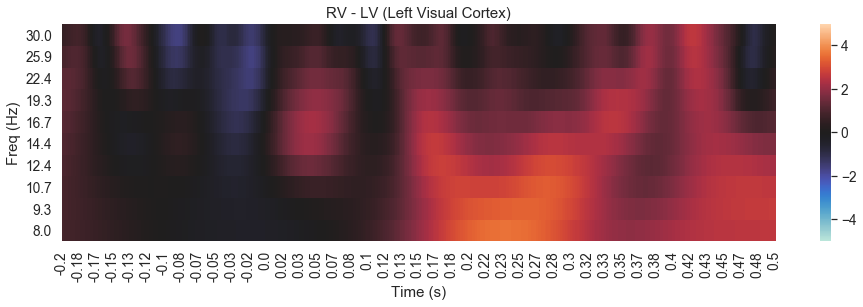

In [9]:
## initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(16,4))

## Compute difference.
diff = RV_power[epochs.ch_names.index('EEG 057')] - LV_power[epochs.ch_names.index('EEG 057')]

## Plotting.
sns.heatmap(diff, center=0, vmin=-5, vmax=5, yticklabels=freqs.round(1), ax=ax)
ax.set(xticks=np.arange(epochs.times.size)[::10], xticklabels=epochs.times[::10].round(2),
       xlabel='Time (s)', ylabel='Freq (Hz)', title='RV - LV (Left Visual Cortex)')
ax.invert_yaxis()